In [38]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [39]:
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True,
        validation_split=0.2)

In [40]:
train_generator = train_datagen.flow_from_directory(
        'Intel_Image\seg_train\seg_train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='training')

<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\krish\AppData\Local\Temp\ipykernel_16016\753476313.py:2: SyntaxWarning: invalid escape sequence '\s'
  'Intel_Image\seg_train\seg_train',


Found 11230 images belonging to 6 classes.


In [41]:
validation_generator = train_datagen.flow_from_directory(
        'Intel_Image\seg_train\seg_train',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical',
        subset='validation') 

Found 2804 images belonging to 6 classes.


<>:2: SyntaxWarning: invalid escape sequence '\s'
<>:2: SyntaxWarning: invalid escape sequence '\s'
C:\Users\krish\AppData\Local\Temp\ipykernel_16016\1143039426.py:2: SyntaxWarning: invalid escape sequence '\s'
  'Intel_Image\seg_train\seg_train',


In [42]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_generator = test_datagen.flow_from_directory(
        'Intel_Image\seg_test\seg_test',
        target_size=(64, 64),
        batch_size=32,
        class_mode='categorical')

Found 3000 images belonging to 6 classes.


<>:3: SyntaxWarning: invalid escape sequence '\s'
<>:3: SyntaxWarning: invalid escape sequence '\s'
C:\Users\krish\AppData\Local\Temp\ipykernel_16016\346254392.py:3: SyntaxWarning: invalid escape sequence '\s'
  'Intel_Image\seg_test\seg_test',


In [43]:
cnn = tf.keras.models.Sequential()


In [44]:
# Add Convolutional Layers with Batch Normalization and MaxPooling
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu', input_shape=([64, 64, 3])))
cnn.add(tf.keras.layers.BatchNormalization())  # Normalize after activation
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))


C:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [45]:
cnn.add(tf.keras.layers.Conv2D(filters=48, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [46]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.BatchNormalization())
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

In [47]:
cnn.add(tf.keras.layers.Flatten())


In [48]:
# Fully Connected Layers with Dropout for Regularization
cnn.add(tf.keras.layers.Dense(128, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))  # Dropout to avoid overfitting
cnn.add(tf.keras.layers.Dense(64, activation='relu'))
cnn.add(tf.keras.layers.Dropout(0.5))
cnn.add(tf.keras.layers.Dense(6, activation='softmax'))  # Output layer (6 classes)

In [49]:
# Compile the Model
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy"])

In [50]:
# Add Early Stopping to stop when validation accuracy does not improve
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)


In [51]:
# Train the Model
cnn.fit(x=train_generator,
        validation_data=validation_generator,
        epochs=30,
        callbacks=[early_stopping])


Epoch 1/30


C:\Users\krish\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


351/351 ━━━━━━━━━━━━━━━━━━━━ 81s 217ms/step - accuracy: 0.3915 - loss: 1.7387 - val_accuracy: 0.4048 - val_loss: 2.2853
Epoch 2/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 76s 201ms/step - accuracy: 0.5821 - loss: 1.1203 - val_accuracy: 0.6765 - val_loss: 0.9145
Epoch 3/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 76s 214ms/step - accuracy: 0.6289 - loss: 1.0140 - val_accuracy: 0.5093 - val_loss: 1.3558
Epoch 4/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 74s 209ms/step - accuracy: 0.6660 - loss: 0.9137 - val_accuracy: 0.6377 - val_loss: 0.9742
Epoch 5/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 67s 189ms/step - accuracy: 0.6890 - loss: 0.8531 - val_accuracy: 0.6719 - val_loss: 0.8769
Epoch 6/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 80s 228ms/step - accuracy: 0.7110 - loss: 0.8248 - val_accuracy: 0.7079 - val_loss: 0.8472
Epoch 7/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 59s 166ms/step - accuracy: 0.7352 - loss: 0.7691 - val_accuracy: 0.6601 - val_loss: 1.0281
Epoch 8/30
351/351 ━━━━━━━━━━━━━━━━━━━━ 52s 147ms/step - accuracy: 0.7499 - loss: 0.7109 - val

In [52]:
# Evaluate the model on the test data
test_loss, test_accuracy = cnn.evaluate(test_generator)
print(f"Test Accuracy: {test_accuracy:.2f}")

94/94 ━━━━━━━━━━━━━━━━━━━━ 23s 247ms/step - accuracy: 0.8465 - loss: 0.4982
Test Accuracy: 0.84


In [53]:
cnn.predict(test_generator)

94/94 ━━━━━━━━━━━━━━━━━━━━ 4s 38ms/step


array([[9.6553725e-01, 1.8853707e-06, 6.8904887e-06, 8.0827384e-08,
        4.9588607e-06, 3.4448881e-02],
       [2.3654936e-04, 1.8964834e-03, 1.9327881e-02, 9.7567040e-01,
        2.7998220e-03, 6.8876558e-05],
       [7.6080079e-04, 1.9567361e-08, 4.5951558e-09, 8.6257953e-14,
        5.5617537e-12, 9.9923921e-01],
       ...,
       [1.1513619e-01, 7.4016163e-04, 1.1111662e-03, 5.9217247e-05,
        1.1538811e-04, 8.8283789e-01],
       [9.6934848e-05, 2.9731025e-06, 4.2839533e-01, 5.7064027e-01,
        8.4291020e-04, 2.1668935e-05],
       [4.1502044e-05, 3.3864805e-07, 4.8849061e-01, 5.1029843e-01,
        1.1628151e-03, 6.2753311e-06]], dtype=float32)

In [59]:
# Make predictions on the test data
Y_pred = cnn.predict(test_generator)
y_pred = np.argmax(Y_pred, axis=1)

94/94 ━━━━━━━━━━━━━━━━━━━━ 5s 54ms/step


In [60]:
# Compute confusion matrix
cm = confusion_matrix(test_generator.classes, y_pred)


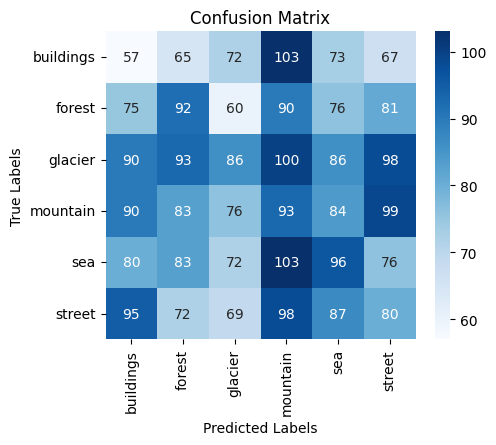

In [61]:
# Plot the confusion matrix
plt.figure(figsize=(5, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), 
            yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

In [63]:
# Print classification report
print(classification_report(test_generator.classes, y_pred, target_names=test_generator.class_indices.keys()))

              precision    recall  f1-score   support

   buildings       0.12      0.13      0.12       437
      forest       0.19      0.19      0.19       474
     glacier       0.20      0.16      0.17       553
    mountain       0.16      0.18      0.17       525
         sea       0.19      0.19      0.19       510
      street       0.16      0.16      0.16       501

    accuracy                           0.17      3000
   macro avg       0.17      0.17      0.17      3000
weighted avg       0.17      0.17      0.17      3000



ValueError: The number of FixedLocator locations (10), usually from a call to set_ticks, does not match the number of labels (3000).

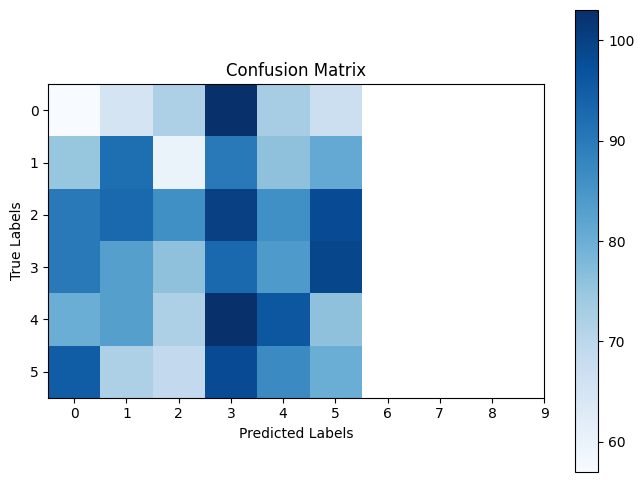

In [65]:
conf_matrix = confusion_matrix(test_generator.classes, y_pred)
plt.figure(figsize=(8, 6))
plt.imshow(conf_matrix, cmap=plt.cm.Blues)
plt.colorbar()
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.xticks(ticks=np.arange(10), labels=test_generator.classes, rotation=45)
plt.yticks(ticks=np.arange(10), labels=test_generator.classes)
plt.show()